# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Santiago silva
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [1]:
def myint(bin_str):

    if bin_str.startswith('0b'):
        bin_str = bin_str[2:]

    bin_str = bin_str.zfill(16) #hace que la longitud sea de 16 bits, si tiene menos de 16, llena de ceros a la izquierda

    return int(bin_str, 2) #convierte a entero

# Probemos la función con el ejemplo dado
numero_binario = '0b1000011100001' #añadimos el numero que nos dan
resultado_myint = myint(numero_binario)
resultado_int = int(numero_binario, 2)

print(resultado_myint)
print(resultado_int)
0b1000011100001

4321
4321


4321

# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [2]:
def number64(bin_str):

    bin_str = bin_str[:64].zfill(64)  #asegurar los 64 bits, si es menos de 64, llena de ceros a la izquierda

    sign_bit = int(bin_str[0]) #bit de signo (posición 0)
    exponent_bits = bin_str[1:12] #exponente (bits 1-11)
    mantissa_bits = bin_str[12:64] #mantissa (bits 12-63)

    sign = (-1) ** sign_bit #calcula el sign

    exponent = int(exponent_bits, 2) - 1023  #convierte los numeros del exponente a entero

    mantissa = 1.0  #calculo de la mantissa
    for i in range(len(mantissa_bits)):
        if mantissa_bits[i] == '1':
            mantissa += 2 ** (-(i + 1))

    return sign * (2 ** exponent) * mantissa
resultado = number64("01000000001110111001000011111111111111111111111111111111111111111")
print(f"Resultado: {resultado}")

Resultado: 27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [3]:
import math

def aproximacion_basica(error_max): #metodo aproximacion basica
    n = 0
    suma = 0
    pi_aprox = 0
    error = math.pi #inicia con el máximo error posible

    while error >= error_max:
        n += 1
        termino = ((-1)**(n+1)) * (1.0**(2*n -1)) / (2*n -1)
        suma += termino
        pi_aprox = 4 * suma
        error = abs(math.pi - pi_aprox)

    return n, pi_aprox

n1, pi1 = aproximacion_basica(1e-3)
print(f"Términos necesarios (error 1e-3): {n1}, Aproximación: {pi1}")

n2, pi2 = aproximacion_basica(1e-4)
print(f"Términos necesarios (error 1e-4): {n2}, Aproximación: {pi2}")

def arctan_terminos(x, error_max_individual):
    n = 0
    suma = 0.0
    error = float('inf')

    while error > error_max_individual:
        n += 1
        termino = ((-1)**(n+1)) * (x**(2*n -1)) / (2*n -1)
        suma += termino
        error = abs(math.atan(x) - suma)

    return n, suma

def mejora_convergencia(error_max_total):
    error_max_individual = error_max_total / 8

    n1, suma1 = arctan_terminos(1/2, error_max_individual) #calculo de terminos para arctan(1/2)
    n2, suma2 = arctan_terminos(1/3, error_max_individual) #calculo de terminos arctan(1/3)

    pi_aprox = 4 * (suma1 + suma2)
    error_real = abs(math.pi - pi_aprox)

    while error_real >= error_max_total:
        n1 +=1
        termino = ((-1)**(n1+1)) * ((1/2)**(2*n1 -1)) / (2*n1 -1)
        suma1 += termino
        pi_aprox = 4 * (suma1 + suma2)
        error_real = abs(math.pi - pi_aprox)

    return n1, n2, pi_aprox


n1, n2, pi1 = mejora_convergencia(1e-3)
print(f"Términos (1/2): {n1}, Términos (1/3): {n2}, Aproximación: {pi1}")

n3, n4, pi2 = mejora_convergencia(1e-6)
print(f"Términos (1/2): {n3}, Términos (1/3): {n4}, Aproximación: {pi2}")

def alta_precision(error_max_total):
    error_max_individual_1 = error_max_total / 20
    error_max_individual_2 = error_max_total / 20

    n1, suma1 = arctan_terminos(1/5, error_max_individual_1) #calculo de arctan(1/5)
    n2, suma2 = arctan_terminos(1/239, error_max_individual_2) #calculo de arctan(1/239)

    pi_aprox = 4 * (4 * suma1 - suma2)
    error_real = abs(math.pi - pi_aprox)

    while error_real >= error_max_total:
        n1 += 1
        termino = ((-1)**(n1+1)) * ((1/5)**(2*n1 -1)) / (2*n1 -1)
        suma1 += termino
        pi_aprox = 4 * (4 * suma1 - suma2)
        error_real = abs(math.pi - pi_aprox)

    return n1, n2, pi_aprox

n1, n2, pi1 = alta_precision(1e-3)
print(f"Términos (1/5): {n1}, Términos (1/239): {n2}, Aproximación: {pi1}")

n3, n4, pi2 = alta_precision(1e-6)
print(f"Términos (1/5): {n3}, Términos (1/239): {n4}, Aproximación: {pi2}")

Términos necesarios (error 1e-3): 1000, Aproximación: 3.140592653839794
Términos necesarios (error 1e-4): 10000, Aproximación: 3.1414926535900345
Términos (1/2): 5, Términos (1/3): 3, Aproximación: 3.1419799015285124
Términos (1/2): 9, Términos (1/3): 6, Aproximación: 3.1415928051045654
Términos (1/5): 3, Términos (1/239): 1, Aproximación: 3.1416209316596935
Términos (1/5): 5, Términos (1/239): 1, Aproximación: 3.1415925847390582


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

x=1: términos necesarios (N) = 11, Error = 2.31e-08

Términos alrededor de n aproximadamente = 9 para x=10:
n=7: -1.9841e+03
n=8: 2.4802e+03
n=9: -2.7557e+03
n=10: 2.7557e+03
n=11: -2.5052e+03

Para x=10:
Error (serie directa): 1.826e-12
Error (1/exp(x)): 6.7763e-21


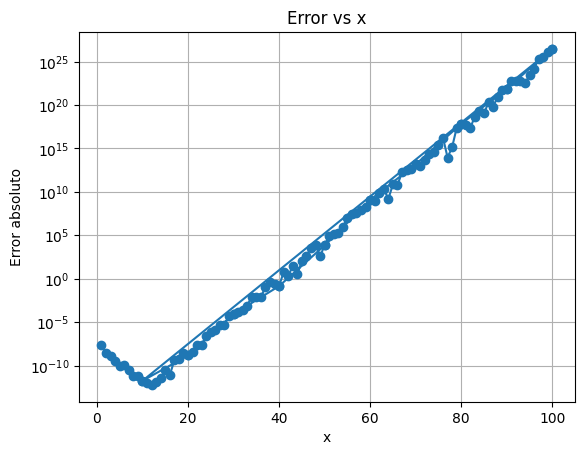

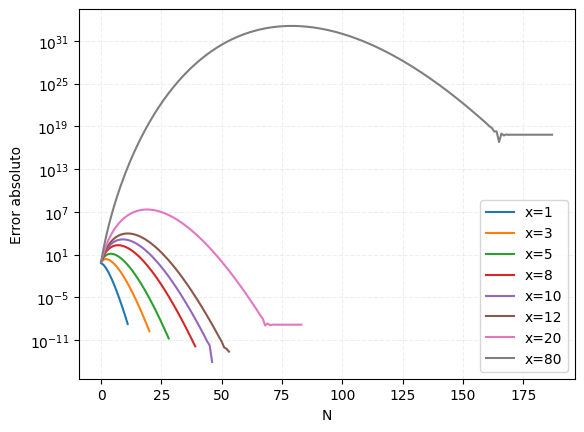

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def serie_e_menos_x(x, tol=1e-7):
    suma = 0
    termino = 1
    n = 0
    terminos = []

    while True:
        suma += termino
        terminos.append(termino)
        next_n = n + 1
        termino_sig = (-x)**next_n / math.factorial(next_n)

        if abs(termino_sig) <= tol * abs(suma): #|término siguiente| <= tol * |suma actual|
            break

        termino = termino_sig
        n = next_n

    return suma, n + 1, terminos #n+1 es el N mínimo requerido

# para x=1
x = 1
suma_serie, N, _ = serie_e_menos_x(x)
valor_real = np.exp(-x)
error = abs(suma_serie - valor_real)
print(f"x={x}: términos necesarios (N) = {N}, Error = {error:.2e}")

def analizar_cancelacion(x):
    _, _, terminos = serie_e_menos_x(x, tol=1e-7)
    print(f"\nTérminos alrededor de n aproximadamente = {x-1} para x={x}:")

    start = max(0, int(x - 3)) #impresion terminos cercanos a n = x-1
    end = min(len(terminos), int(x + 2))

    for i in range(start, end):
        print(f"n={i}: {terminos[i]:.4e}")

# para x=10
analizar_cancelacion(10)

def comparar_metodos(x):
    #Método directo (serie)
    suma_serie, _, _ = serie_e_menos_x(x, tol=1e-7)
    error_serie = abs(suma_serie - np.exp(-x))

    #Método indirecto (1/e^x)
    suma_exp = 1.0 / np.exp(x)
    error_exp = abs(suma_exp - np.exp(-x))

    print(f"\nPara x={x}:")
    print(f"Error (serie directa): {error_serie:.4}")
    print(f"Error (1/exp(x)): {error_exp:.4e}")

#para x=10
comparar_metodos(10)

def evaluar_precision(x_max):
    errores = []
    xs = list(range(1, x_max + 1)) + list(range(10, x_max + 1, 10))

    for x in xs:
        try:
            suma_serie, _, _ = serie_e_menos_x(x, tol=1e-7)
            error = abs(suma_serie - np.exp(-x))
            errores.append(error)
        except OverflowError:
            errores.append(np.nan)

    plt.plot(xs, errores, 'o-')
    plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('Error absoluto')
    plt.title('Error vs x')
    plt.grid()
    plt.show()

#ejecutamos desde x hasta 100
evaluar_precision(100)

def graficar_error_vs_N(x_values):
    for x in x_values:
        _, N, _ = serie_e_menos_x(x, tol=1e-7)
        errores = []
        suma_parcial = 0.0
        termino = 1.0

        for n in range(N + 1):
            suma_parcial += termino
            error = abs(suma_parcial - np.exp(-x))
            errores.append(error)
            termino = (-x)**(n + 1) / math.factorial(n + 1)

        plt.plot(range(N + 1), errores, label=f'x={x}')

    plt.yscale('log')
    plt.xlabel('N')
    plt.ylabel('Error absoluto')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.show()

graficar_error_vs_N([1, 3, 5, 8, 10, 12, 20, 80])

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


Delta		Aproximación	Error Absoluto
1e-02		1.01000000000000089706	1.00e-02
1e-04		1.00009999999988985486	1.00e-04
1e-06		1.00000099991773327979	1.00e-06
1e-08		1.00000000392252874626	3.92e-09
1e-10		1.00000008284037100736	8.28e-08
1e-12		1.00008890058334132256	8.89e-05
1e-14		0.99920072216265087839	7.99e-04


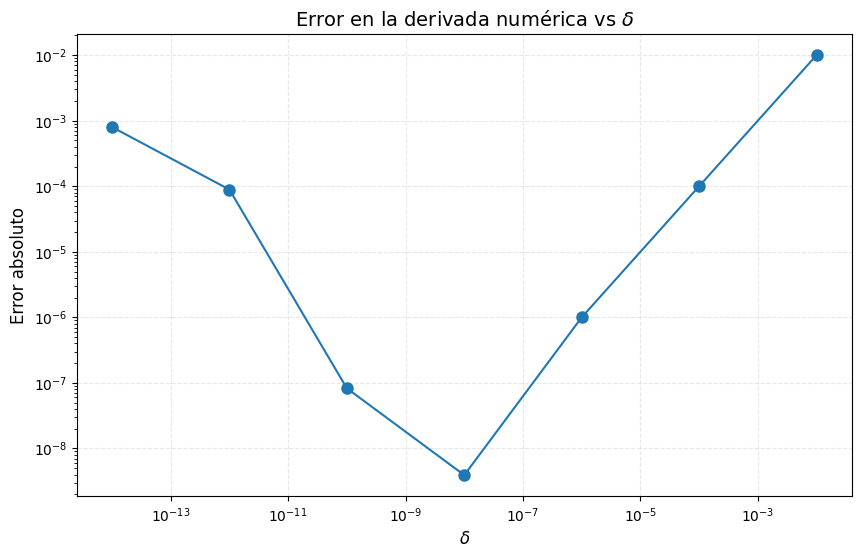

la derivada númerica en x = 1  con delta = 10^-2 es 1.01, pero el valor exacto es 1. la diferencia de .01 es debida al error de truncamiento de la aproximación númerica
para deltas grandes el error está dominado por el truncamiento
para deltas pequeños el error está dominado por el redondeo


In [7]:
import matplotlib.pyplot as plt
def f(x):
    return x * (x - 1)

def df_exacta(x): #la derivada exacta
    return 2 * x - 1

def derivada_numerica(f, x, delta):
    return (f(x + delta) - f(x)) / delta

deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

resultados = []
for delta in deltas:
    aproximacion = derivada_numerica(f, x=1, delta=delta)
    error = abs(aproximacion - df_exacta(1))
    resultados.append((delta, aproximacion, error))

print("Delta\t\tAproximación\tError Absoluto")
for delta, aprox, error in resultados:
    print(f"{delta:.0e}\t\t{aprox:.20f}\t{error:.2e}")

deltas_num = np.array([d[0] for d in resultados])
errores = np.array([d[2] for d in resultados])

plt.figure(figsize=(10, 6))
plt.loglog(deltas_num, errores, 'o-', markersize=8)
plt.xlabel('$\delta$', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Error en la derivada numérica vs $\delta$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

print('la derivada númerica en x = 1  con delta = 10^-2 es 1.01, pero el valor exacto es 1. la diferencia de .01 es debida al error de truncamiento de la aproximación númerica')
print('para deltas grandes el error está dominado por el truncamiento')
print('para deltas pequeños el error está dominado por el redondeo')